<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%203/R/Week3_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Econometrics

In [1]:
rm(list=ls())
if (!require(pacman)) install.packages("pacman")
library(pacman) ; p_load('foreign', 'data.table')

Loading required package: pacman



Load data

In [2]:
Data.File <- "https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%203/data/database_angrist_levy_09.dta"
Data<-read.dta(Data.File, convert.dates = TRUE, convert.factors = TRUE,missing.type = FALSE,convert.underscore = FALSE, warn.missing.labels = TRUE)

In [3]:
# Structure of the DataFrame
str(Data)

'data.frame':	12188 obs. of  49 variables:
 $ treated   : int  0 1 0 1 1 0 1 1 0 0 ...
 $ pair      : int  18 7 13 5 20 19 1 16 2 20 ...
 $ m_ahim    : int  5 2 3 3 2 3 7 3 4 2 ...
 $ boy       : int  1 0 1 1 1 1 1 1 0 1 ...
 $ ole5      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ educav    : int  8 1 12 8 8 10 6 10 12 16 ...
 $ educem    : int  7 1 15 8 7 11 5 11 12 10 ...
 $ zakaibag  : int  1 0 0 0 1 0 0 0 0 0 ...
 $ lagscore  : num  73.3 0 0 85.9 74 ...
 $ semrel    : int  0 0 0 1 0 0 1 0 1 0 ...
 $ semarab   : int  1 0 0 0 1 0 0 0 0 0 ...
 $ att18     : int  1 0 0 1 1 0 0 0 0 1 ...
 $ att20     : int  1 0 0 1 1 0 0 0 0 1 ...
 $ att22     : int  1 0 0 1 1 0 0 0 0 1 ...
 $ att24     : int  1 0 0 1 1 0 0 0 0 1 ...
 $ awr18     : int  1 0 0 1 1 0 0 0 0 1 ...
 $ awr20     : int  1 0 0 1 1 0 0 0 0 1 ...
 $ awr22     : int  1 0 0 1 1 0 0 0 0 1 ...
 $ awr24     : int  1 0 0 1 1 0 0 0 0 1 ...
 $ achv_math : int  1 0 0 0 1 0 0 0 0 0 ...
 $ achv_eng  : int  1 0 0 1 1 0 0 0 0 1 ...
 $ achv_hib  : int  

In [4]:
# Summary statistics for the DataFrame
summary(Data)

    treated            pair           m_ahim            boy        
 Min.   :0.0000   Min.   : 1.00   Min.   : 1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.: 4.00   1st Qu.: 2.000   1st Qu.:0.0000  
 Median :1.0000   Median :11.00   Median : 3.000   Median :1.0000  
 Mean   :0.5056   Mean   :10.74   Mean   : 3.695   Mean   :0.5142  
 3rd Qu.:1.0000   3rd Qu.:16.00   3rd Qu.: 5.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :20.00   Max.   :22.000   Max.   :1.0000  
      ole5             educav          educem          zakaibag     
 Min.   :0.00000   Min.   : 1.00   Min.   : 1.000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.: 8.00   1st Qu.: 8.000   1st Qu.:0.0000  
 Median :0.00000   Median :10.00   Median :10.000   Median :0.0000  
 Mean   :0.06342   Mean   :10.05   Mean   : 9.958   Mean   :0.2586  
 3rd Qu.:0.00000   3rd Qu.:12.00   3rd Qu.:12.000   3rd Qu.:1.0000  
 Max.   :1.00000   Max.   :25.00   Max.   :25.000   Max.   :1.0000  
    lagscore          semrel          sem

# Table 1- Descriptive Statistics

In [5]:
# Panel A.2001
summary_table <- data.table(

  Variable = c("Bagrut rate",
               "Arab school", "Religious school",
               "Father's education", "Mother's education", "Number of siblings", "Inmigrant", "Lagged Bagrut"),

  All_Mean = c(
    mean(Data$zakaibag[Data$panel == 1], na.rm = TRUE), # Indicates for Bagrut status
    mean(Data$semarab[Data$panel == 1], na.rm = TRUE),  # Arab school
    mean(Data$semrel[Data$panel == 1], na.rm = TRUE),   # Religious school
    mean(Data$educav[Data$panel == 1], na.rm = TRUE),   # Father's education
    mean(Data$educem[Data$panel == 1], na.rm = TRUE),   # Mother's education
    mean(Data$m_ahim[Data$panel == 1], na.rm = TRUE),   # Number of siblings
    mean(Data$ole5[Data$panel == 1], na.rm = TRUE),     # Indicates immigrants
    mean(Data$lagscore[Data$panel == 1], na.rm = TRUE)  # Lagged Bagrut score

  ),

  Boys_Mean = c(
    mean(Data$zakaibag[Data$panel == 1 & Data$boy == 1], na.rm = TRUE),
    mean(Data$semarab[Data$panel == 1 & Data$boy == 1], na.rm = TRUE),
    mean(Data$semrel[Data$panel == 1 & Data$boy == 1], na.rm = TRUE),
    mean(Data$educav[Data$panel == 1 & Data$boy == 1], na.rm = TRUE),
    mean(Data$educem[Data$panel == 1 & Data$boy == 1], na.rm = TRUE),
    mean(Data$m_ahim[Data$panel == 1 & Data$boy == 1], na.rm = TRUE),
    mean(Data$ole5[Data$panel == 1 & Data$boy == 1], na.rm = TRUE),
    mean(Data$lagscore[Data$panel == 1 & Data$boy == 1], na.rm = TRUE)
  ),

  Girls_Mean = c(
    mean(Data$zakaibag[Data$panel == 1 & Data$boy == 0], na.rm = TRUE),
    mean(Data$semarab[Data$panel == 1 & Data$boy == 0], na.rm = TRUE),
    mean(Data$semrel[Data$panel == 1 & Data$boy == 0], na.rm = TRUE),
    mean(Data$educav[Data$panel == 1 & Data$boy == 0], na.rm = TRUE),
    mean(Data$educem[Data$panel == 1 & Data$boy == 0], na.rm = TRUE),
    mean(Data$m_ahim[Data$panel == 1 & Data$boy == 0], na.rm = TRUE),
    mean(Data$ole5[Data$panel == 1 & Data$boy == 0], na.rm = TRUE),
    mean(Data$lagscore[Data$panel == 1 & Data$boy == 0], na.rm = TRUE)
  )

)

summary_table


Variable,All_Mean,Boys_Mean,Girls_Mean
<chr>,<dbl>,<dbl>,<dbl>
Bagrut rate,0.24260665,0.20000000,0.2874798
Arab school,0.34807642,0.37448980,0.3202579
Religious school,0.11515310,0.08418367,0.1477700
Father's education,10.07013871,9.81887755,10.3347663
Mother's education,10.01779639,9.86683673,10.1767867
Number of siblings,3.74221408,3.65051020,3.8387963
Inmigrant,0.06359592,0.02857143,0.1004836
Lagged Bagrut,53.11965657,52.06225568,54.2333082


In [6]:
# t-test to compare the means of semrel and semarab
t.test(Data$semrel[Data$panel==1], Data$semarab[Data$panel==1],
       alternative = c("two.sided"), conf.level = 0.95)


	Welch Two Sample t-test

data:  Data$semrel[Data$panel == 1] and Data$semarab[Data$panel == 1]
t = -25.106, df = 6674.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2511107 -0.2147360
sample estimates:
mean of x mean of y 
0.1151531 0.3480764 


In [7]:
# t-test to compare the means of the treated variable across the groups defined by semarab
t.test(Data$treated[Data$panel==1] ~ Data$semarab[Data$panel==1],
       alternative = c("two.sided"),conf.level = 0.95)


	Welch Two Sample t-test

data:  Data$treated[Data$panel == 1] by Data$semarab[Data$panel == 1]
t = 2.1747, df = 2712.5, p-value = 0.02974
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 0.003631119 0.070201596
sample estimates:
mean in group 0 mean in group 1 
      0.5218788       0.4849624 


In [8]:
# t-test to compare the means of the treated variable across the groups defined by semrel
t.test(Data$treated[Data$panel==1] ~ Data$semrel[Data$panel==1],
       alternative = c("two.sided"),conf.level = 0.95)


	Welch Two Sample t-test

data:  Data$treated[Data$panel == 1] by Data$semrel[Data$panel == 1]
t = 5.1616, df = 564.69, p-value = 3.397e-07
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 0.07951154 0.17719841
sample estimates:
mean in group 0 mean in group 1 
      0.5238095       0.3954545 


In [9]:
#Estimate liner model:
 model1<-lm(zakaibag ~ treated, data=subset(Data, panel == 1))
 summary(model1)


Call:
lm(formula = zakaibag ~ treated, data = subset(Data, panel == 
    1))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2658 -0.2658 -0.2185 -0.2185  0.7814 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.218550   0.009884  22.111  < 2e-16 ***
treated     0.047260   0.013854   3.411 0.000653 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4281 on 3819 degrees of freedom
Multiple R-squared:  0.003038,	Adjusted R-squared:  0.002777 
F-statistic: 11.64 on 1 and 3819 DF,  p-value: 0.0006534


In [10]:
# mean of residuals
  mean(model1$residuals)

[1] 2.121285e-17

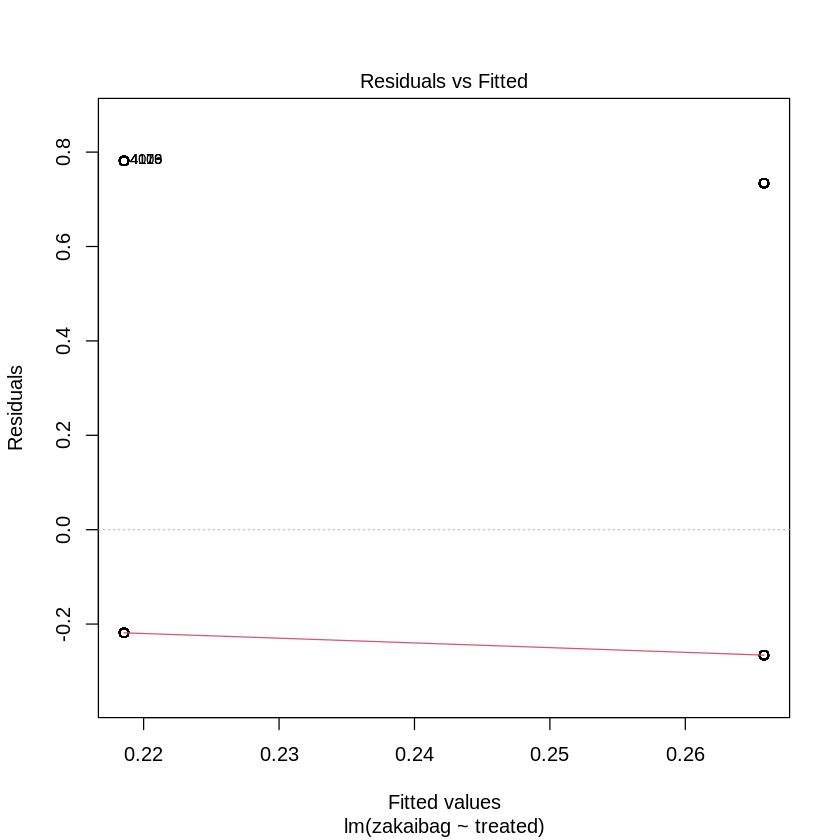

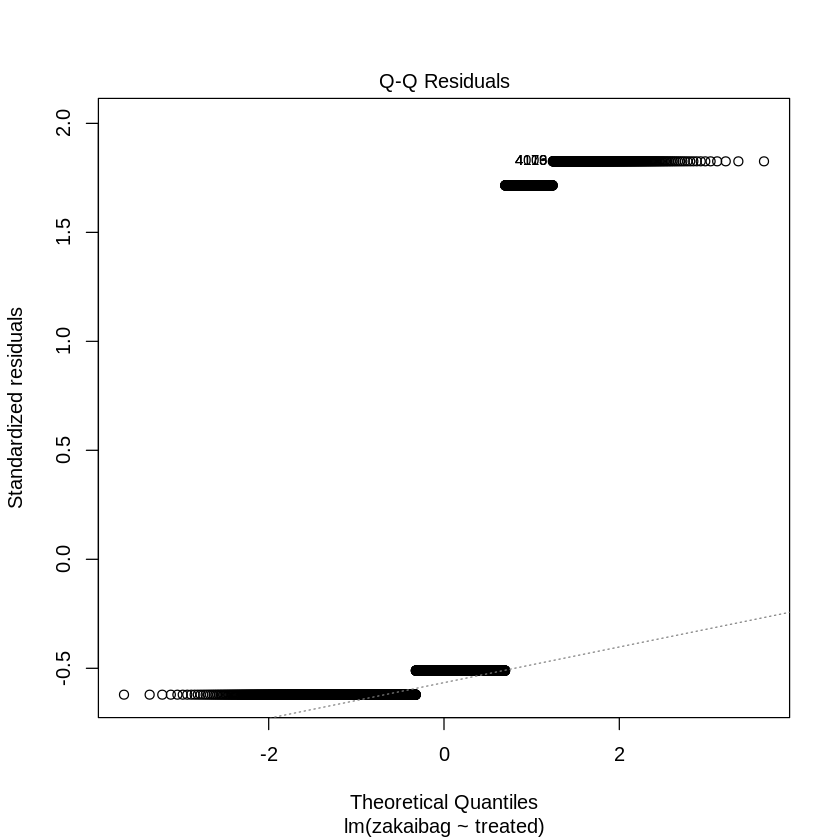

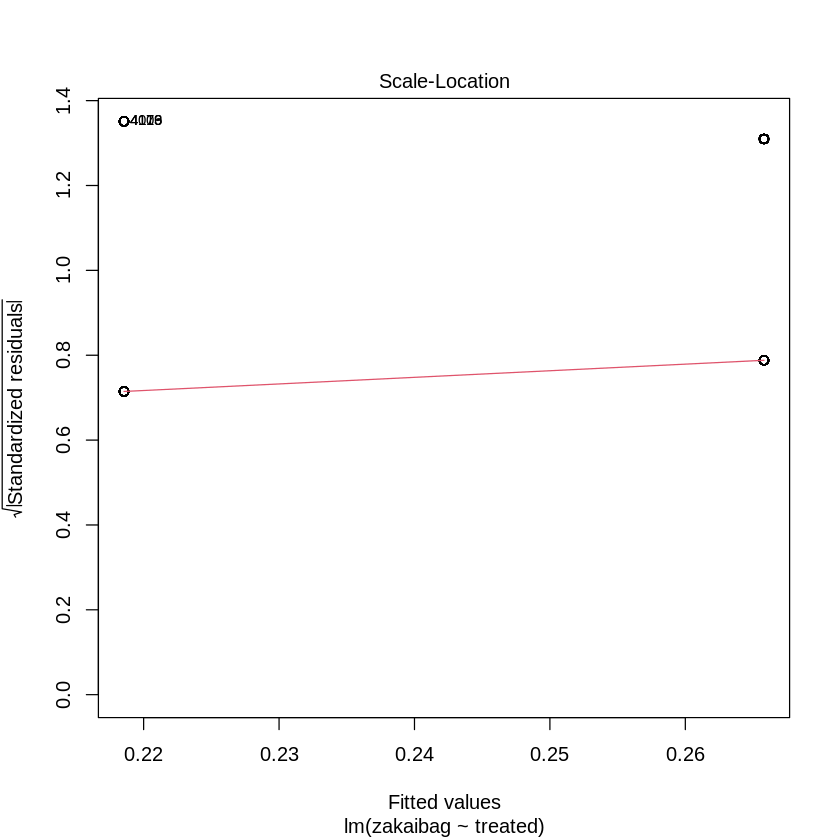

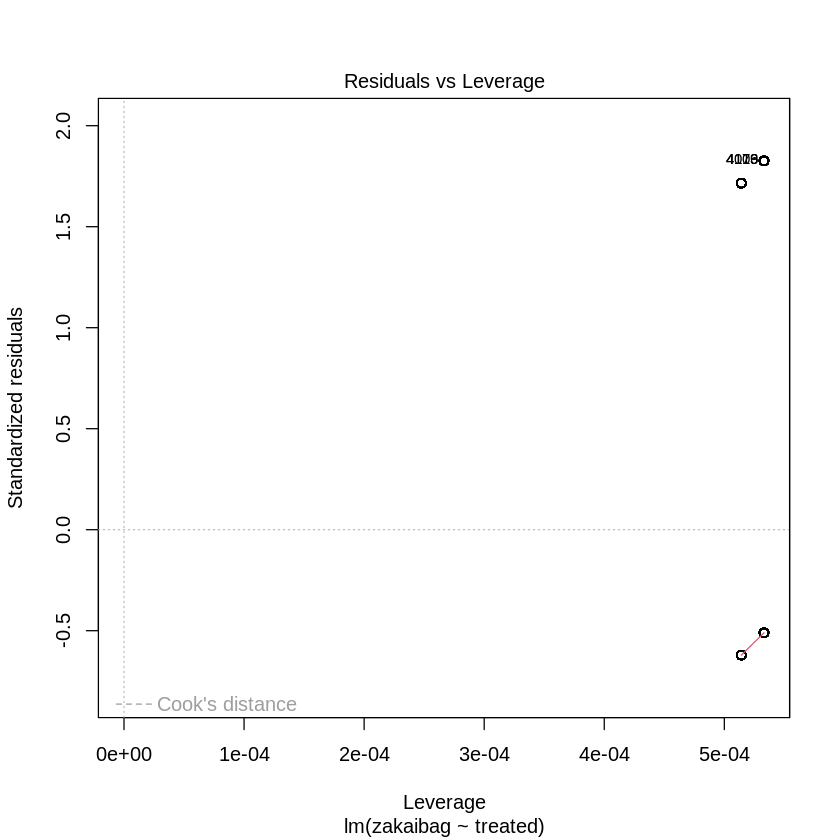

In [11]:
#checking equal variance of residuals
#  par(mfrow=c(2,2))
  plot(model1)

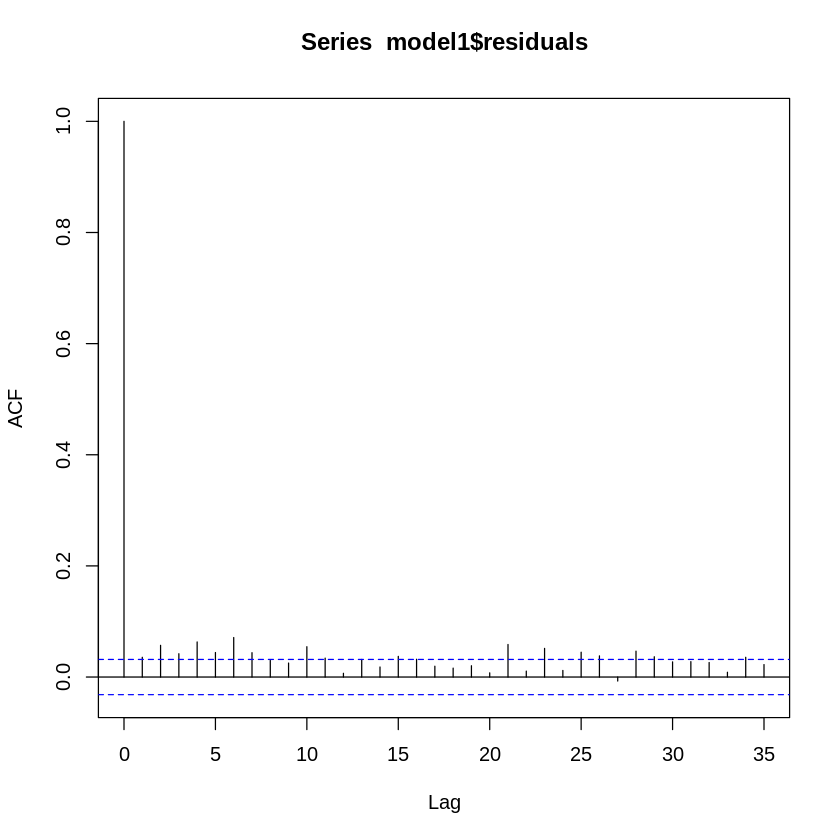

In [12]:
# no autocorrelation of residuals
 acf(model1$residuals)

In [13]:
#correlation between observables and residuals
 cor.test(Data$zakaibag[Data$panel==1], model1$residuals) #very bad assumptio breaks for this model



	Pearson's product-moment correlation

data:  Data$zakaibag[Data$panel == 1] and model1$residuals
t = 1119.5, df = 3819, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9983805 0.9985733
sample estimates:
    cor 
0.99848 


what if we want a more comprehensive plot ?

first, let's estimate a better model

# School covariates, quartile dumies, micro covariates, see Table - 2  

In [14]:
 # covariates
 ip <- sapply(grep("^_Ip", colnames(Data), value = TRUE), function(x) paste0("`", x, "`"))
 covar <- c("treated", "semarab", "semrel", "ls50", "ls75", "ls100",
                     "educav", "educem", "ah4", "ole5",ip)

 fm2 <- as.formula(paste("zakaibag ~", paste(covar, collapse = " + ")))

In [15]:
 fm2 <- as.formula(paste("zakaibag ~", paste(covar, collapse = " + ")))


  model2<-lm(fm2, data=subset(Data, panel == 1))
  summary(model2)


Call:
lm(formula = fm2, data = subset(Data, panel == 1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81072 -0.24855 -0.04382  0.19393  1.09990 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.281408   0.035763  -7.869 4.64e-15 ***
treated      0.067453   0.013130   5.137 2.93e-07 ***
semarab      0.172186   0.021672   7.945 2.54e-15 ***
semrel       0.205685   0.024442   8.415  < 2e-16 ***
ls50         0.093367   0.017637   5.294 1.27e-07 ***
ls75         0.328421   0.017517  18.749  < 2e-16 ***
ls100        0.511535   0.017738  28.839  < 2e-16 ***
educav       0.003805   0.002730   1.394 0.163460    
educem       0.006967   0.002820   2.470 0.013550 *  
ah4         -0.033768   0.016131  -2.093 0.036381 *  
ole5         0.043885   0.030419   1.443 0.149189    
`_Ipair_2`  -0.003486   0.040248  -0.087 0.930980    
`_Ipair_3`  -0.080769   0.038956  -2.073 0.038210 *  
`_Ipair_4`   0.003578   0.034942   0.102 0.918452    
`_Ipair_5`   

In [16]:
  Data.cor<-subset(Data, panel == 1)
  Data.cor$residuals<-model2$residuals

  cor(Data.cor[,c("zakaibag","treated", "semarab", "semrel", "ls50", "ls75", "ls100", "educav", "educem", "ah4", "ole5")],method='spearman')
  cor.test(Data.cor$treated, Data.cor$lagscore)

,zakaibag,treated,semarab,semrel,ls50,ls75,ls100,educav,educem,ah4,ole5
zakaibag,1.000000000,0.05511600,0.061947018,0.05977667,-0.204204996,0.130386659,0.391487085,0.098137353,0.072025241,0.001098796,0.007622156
treated,0.055116001,1.00000000,-0.035176717,-0.08195688,0.020071654,0.032188576,-0.018293937,0.040673575,0.071371601,0.016416258,-0.121622819
semarab,0.061947018,-0.03517672,1.000000000,-0.26359836,-0.049994749,0.003427121,0.004933648,-0.463996794,-0.593340391,0.602369715,-0.190424106
semrel,0.059776673,-0.08195688,-0.263598363,1.00000000,-0.080418639,-0.051980273,0.018541482,0.202545794,0.168941185,0.026295407,0.389788859
ls50,-0.204204996,0.02007165,-0.049994749,-0.08041864,1.000000000,-0.332950312,-0.330188360,-0.006125722,0.003293749,-0.022872172,-0.099056899
ls75,0.130386659,0.03218858,0.003427121,-0.05198027,-0.332950312,1.000000000,-0.336943118,-0.001668225,-0.001705525,-0.025327180,-0.087814286
ls100,0.391487085,-0.01829394,0.004933648,0.01854148,-0.330188360,-0.336943118,1.000000000,0.117077125,0.109238447,-0.041276256,0.027570589
educav,0.098137353,0.04067358,-0.463996794,0.20254579,-0.006125722,-0.001668225,0.117077125,1.000000000,0.691898358,-0.353619318,0.209213451
educem,0.072025241,0.07137160,-0.593340391,0.16894119,0.003293749,-0.001705525,0.109238447,0.691898358,1.000000000,-0.453117699,0.218056516
ah4,0.001098796,0.01641626,0.602369715,0.02629541,-0.022872172,-0.025327180,-0.041276256,-0.353619318,-0.453117699,1.000000000,-0.091806296



	Pearson's product-moment correlation

data:  Data.cor$treated and Data.cor$lagscore
t = 1.2282, df = 3819, p-value = 0.2195
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01184664  0.05154664
sample estimates:
       cor 
0.01986997 


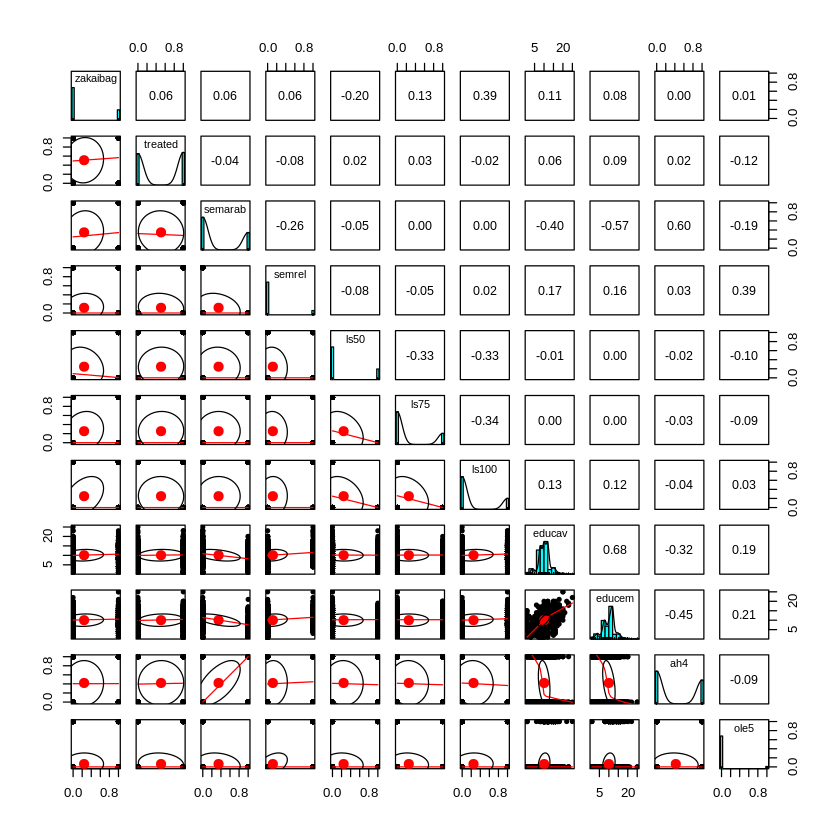

In [17]:
p_load(psych)
pairs.panels(Data.cor[,c("zakaibag","treated", "semarab", "semrel", "ls50", "ls75", "ls100", "educav", "educem", "ah4", "ole5")])


Finally we can use diffent statistics to know how good our model is:

AIC	Lower the better; The Akaike’s information criterion - AIC (Akaike, 1974)

BIC	Lower the better; Bayesian information criterion - BIC (Schwarz, 1978)

both measure of the goodness of fit of an estimated statistical model and can also be used for model selection. Both criteria depend on the maximized value of the likelihood function L for the estimated model.
For model comparison, the model with the lowest AIC and BIC score is preferred.

In [18]:
 AIC(model1)
 BIC(model1)

 AIC(model2)
 BIC(model2)

[1] 4364.417

[1] 4383.162

[1] 3097.289

[1] 3284.737

In [19]:
 # Table 2 -  Treatment Efects ans especification check

 model1<-lm(zakaibag ~ treated + semarab + semrel, data=subset(Data, panel == 1))
 model2<-lm(zakaibag ~ treated + semarab + semrel + ls50 + ls75 + ls100 + educav + educem + ah4 + ole5, data=subset(Data, panel == 1))

 model3<-lm(paste0("zakaibag ~ treated + semarab + semrel +", paste(ip, collapse = " + ")) , data=subset(Data, panel == 1))
 model4<-lm(paste("zakaibag ~", paste(covar, collapse = " + ")), data=subset(Data, panel == 1))

 p_load(stargazer)
 stargazer(model1,model2,model3,model4,type = "text")


                                                                     Dependent variable:                                                 
                    ---------------------------------------------------------------------------------------------------------------------
                                         zakaibag                       zakaibag ~ treated + semarab + semrel +        zakaibag ~        
                              (1)                       (2)                               (3)                              (4)           
-----------------------------------------------------------------------------------------------------------------------------------------
treated                     0.056***                  0.052***                         0.052***                         0.067***         
                            (0.014)                   (0.012)                           (0.015)                          (0.013)         
                                 

In [20]:
# AIC
 list(AIC(model1), AIC(model2), AIC(model3), AIC(model4))

 # BIC
 list(BIC(model1), BIC(model2), BIC(model3), BIC(model4))


[[1]]
[1] 4325.013

[[2]]
[1] 3254.386

[[3]]
[1] 4083.324

[[4]]
[1] 3097.289

[[1]]
[1] 4356.254

[[2]]
[1] 3329.365

[[3]]
[1] 4227.035

[[4]]
[1] 3284.737

In [21]:
#back to hypothesis testing
p_load(AER)
p_load(scales)

In [22]:
# load the `CASchools` dataset
data(CASchools)

In [23]:
# add student-teacher ratio
CASchools$STR <- CASchools$students/CASchools$teachers


In [24]:
# add average test-score
CASchools$score <- (CASchools$read + CASchools$math)/2


In [25]:
# estimate the model
linear_model <- lm(score ~ STR, data = CASchools)

In [26]:
# print the summary of the coefficients to the console
summary(linear_model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),698.932949,9.4674911,73.824516,6.569846e-242
STR,-2.279808,0.4798255,-4.751327,2.783308e-06


Note that summary() does not perform the normal approximation but calculates values using the t distribution instead. Generally, the degrees of freedom of the assumed distribution are determined in the following manner: DF = n-(number of covariates)-1


In [27]:
# determine residual degrees of freedom
linear_model$df.residual

[1] 418

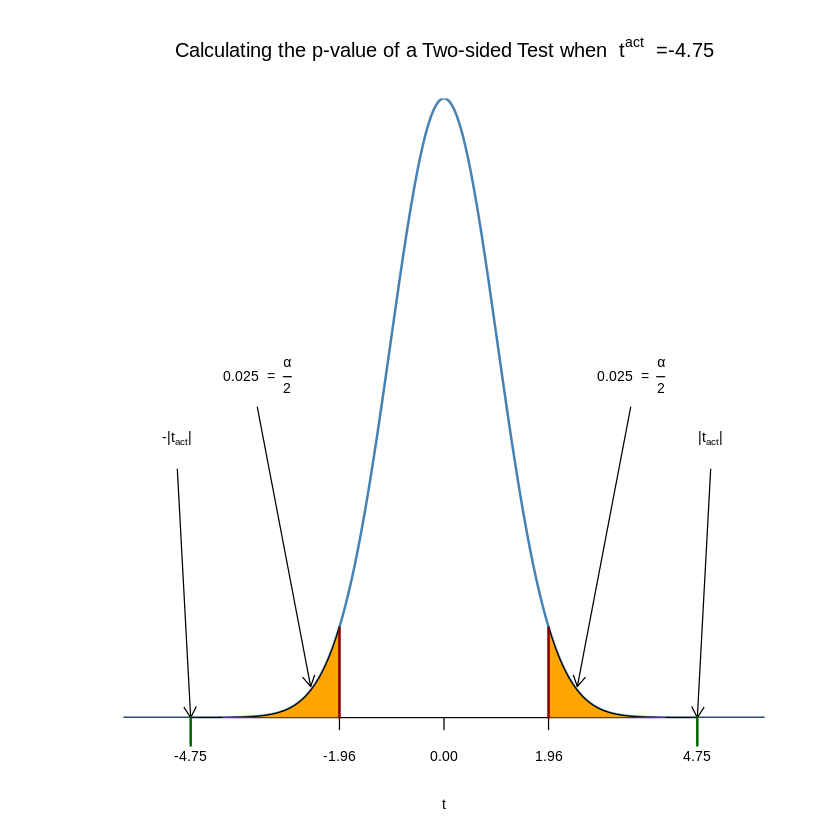

In [28]:
# Plot the standard normal on the support [-6,6]
t <- seq(-6, 6, 0.01)

plot(x = t,
     y = dnorm(t, 0, 1),
     type = "l",
     col = "steelblue",
     lwd = 2,
     yaxs = "i",
     axes = F,
     ylab = "",
     main = expression("Calculating the p-value of a Two-sided Test when" ~ t^act ~ "=-4.75"),
     cex.lab = 0.7,
     cex.main = 1)

tact <- -4.75

axis(1, at = c(0, -1.96, 1.96, -tact, tact), cex.axis = 0.7)

# Shade the critical regions using polygon():

# critical region in left tail
polygon(x = c(-6, seq(-6, -1.96, 0.01), -1.96),
        y = c(0, dnorm(seq(-6, -1.96, 0.01)), 0),
        col = 'orange')

# critical region in right tail

polygon(x = c(1.96, seq(1.96, 6, 0.01), 6),
        y = c(0, dnorm(seq(1.96, 6, 0.01)), 0),
        col = 'orange')

# Add arrows and texts indicating critical regions and the p-value
arrows(-3.5, 0.2, -2.5, 0.02, length = 0.1)
arrows(3.5, 0.2, 2.5, 0.02, length = 0.1)

arrows(-5, 0.16, -4.75, 0, length = 0.1)
arrows(5, 0.16, 4.75, 0, length = 0.1)

text(-3.5, 0.22,
     labels = expression("0.025"~"="~over(alpha, 2)),
     cex = 0.7)
text(3.5, 0.22,
     labels = expression("0.025"~"="~over(alpha, 2)),
     cex = 0.7)

text(-5, 0.18,
     labels = expression(paste("-|",t[act],"|")),
     cex = 0.7)
text(5, 0.18,
     labels = expression(paste("|",t[act],"|")),
     cex = 0.7)
# Add ticks indicating critical values at the 0.05-level, t^act and -t^act
rug(c(-1.96, 1.96), ticksize  = 0.145, lwd = 2, col = "darkred")
rug(c(-tact, tact), ticksize  = -0.0451, lwd = 2, col = "darkgreen")

To get a better understanding of confidence intervals we conduct another simulation study.

In [29]:
# set seed for reproducibility
set.seed(4)

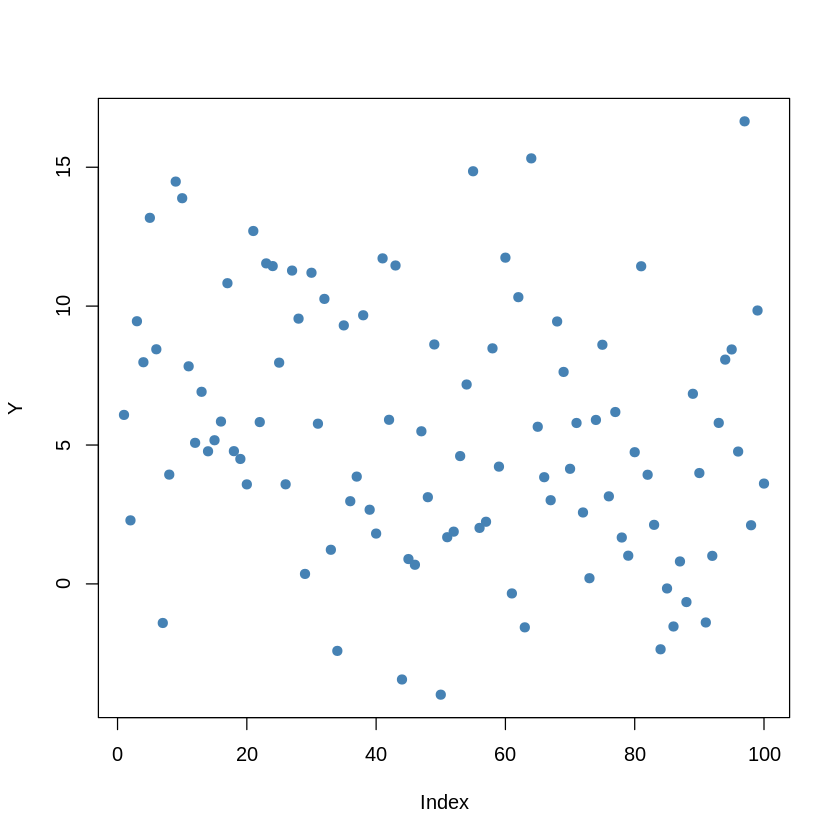

In [30]:
# generate and plot the sample data
Y <- rnorm(n = 100,
           mean = 5,
           sd = 5)
plot(Y,
     pch = 19,
     col = "steelblue")

In [31]:
#we can compute this interval in R by hand.
cbind(CIlower = mean(Y) - 1.96 * 5 / 10, CIupper = mean(Y) + 1.96 * 5 / 10)

CIlower,CIupper
4.502625,6.462625


Knowing that mu=5 we see that, for our example
data, the confidence interval covers true value.


In [32]:
set.seed(1)

In [33]:
# initialize vectors of lower and upper interval boundaries
lower <- numeric(10000)
upper <- numeric(10000)

In [34]:
# loop sampling / estimation / CI
for(i in 1:10000) {
  Y <- rnorm(100, mean = 5, sd = 5)
  lower[i] <- mean(Y) - 1.96 * 5 / 10
  upper[i] <- mean(Y) + 1.96 * 5 / 10
}

In [35]:
# join vectors of interval bounds in a matrix
CIs <- cbind(lower, upper)

In [36]:
#do all CIs cover the true value of mu?
mean(CIs[, 1] <= 5 & 5 <= CIs[, 2])

[1] 0.9487

we see that not in all cases this is true

In [37]:
# identify intervals not covering mu
ID <- which(!(CIs[1:100, 1] <= 5 & 5 <= CIs[1:100, 2]))


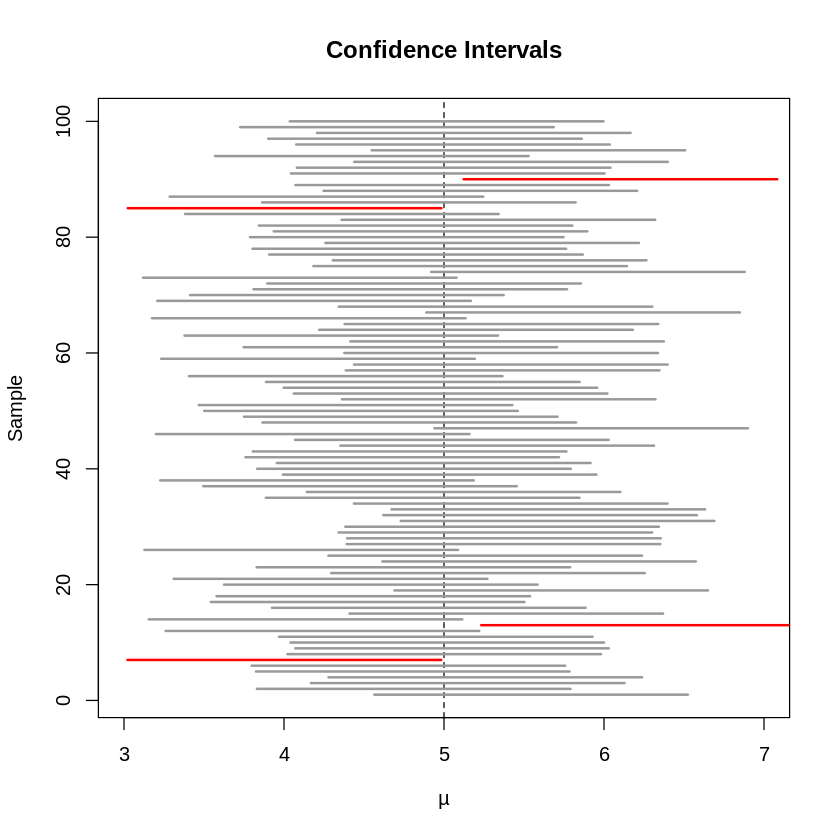

In [38]:
# initialize the plot
plot(0,
     xlim = c(3, 7),
     ylim = c(1, 100),
     ylab = "Sample",
     xlab = expression(mu),
     main = "Confidence Intervals")

# set up color vector
colors <- rep(gray(0.6), 100)
colors[ID] <- "red"

# draw reference line at mu=5
abline(v = 5, lty = 2)

# add horizontal bars representing the CIs
for(j in 1:100) {

  lines(c(CIs[j, 1], CIs[j, 2]),
        c(j, j),
        col = colors[j],
        lwd = 2)

}

In [39]:
# compute 95% confidence interval for coefficients in 'linear_model'
confint(linear_model)

,2.5 %,97.5 %
(Intercept),680.32312,717.542775
STR,-3.22298,-1.336636


In [40]:
# compute 95% confidence interval for coefficients in 'linear_model' by hand
lm_summ <- summary(linear_model)

In [41]:
#compute those confidence intervals by hand
c("lower" = lm_summ$coef[2,1] - qt(0.975, df = lm_summ$df[2]) * lm_summ$coef[2, 2],
  "upper" = lm_summ$coef[2,1] + qt(0.975, df = lm_summ$df[2]) * lm_summ$coef[2, 2])


lower     upper 
-3.222980 -1.336636